In [2]:
!pip install gensim nltk

In [3]:
import nltk
import nltk.corpus
from nltk.tokenize import word_tokenize
import gensim
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [4]:
#  Load Reuters dataset (news articles)

In [5]:
nltk.download('reuters')
reuters = nltk.corpus.reuters
documents = reuters.fileids()

[nltk_data] Downloading package reuters to /root/nltk_data...


In [6]:
def preprocess(text):
    tokens = word_tokenize(text.lower())  # Lowercase & tokenize
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation/numbers
    return tokens

for file_id in documents[0:1]:
  print(reuters.raw(file_id))
tokens_returned = [preprocess(reuters.raw(file)) for file in documents]
tokens_returned[0][0:20]

ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT
  Mounting trade friction between the
  U.S. And Japan has raised fears among many of Asia's exporting
  nations that the row could inflict far-reaching economic
  damage, businessmen and officials said.
      They told Reuter correspondents in Asian capitals a U.S.
  Move against Japan might boost protectionist sentiment in the
  U.S. And lead to curbs on American imports of their products.
      But some exporters said that while the conflict would hurt
  them in the long-run, in the short-term Tokyo's loss might be
  their gain.
      The U.S. Has said it will impose 300 mln dlrs of tariffs on
  imports of Japanese electronics goods on April 17, in
  retaliation for Japan's alleged failure to stick to a pact not
  to sell semiconductors on world markets at below cost.
      Unofficial Japanese estimates put the impact of the tariffs
  at 10 billion dlrs and spokesmen for major electronics firms
  said they would virtually halt exports

['asian',
 'exporters',
 'fear',
 'damage',
 'from',
 'rift',
 'mounting',
 'trade',
 'friction',
 'between',
 'the',
 'and',
 'japan',
 'has',
 'raised',
 'fears',
 'among',
 'many',
 'of',
 'asia']

In [7]:
# train Word2Vec model using CBOW
model_cbow = Word2Vec(sentences=tokens_returned, vector_size=100, window=5, min_count=1, sg=0)
check_word = 'asia'
print("Model CBOW - Words similar to ",check_word , model_cbow.wv.most_similar(check_word))

Model CBOW - Words similar to  asia [('southeast', 0.9317502975463867), ('province', 0.8910444378852844), ('oceania', 0.8778659701347351), ('eastern', 0.876634955406189), ('oklahoma', 0.8626117706298828), ('francophone', 0.8538311719894409), ('animal', 0.8534606099128723), ('shipbuilding', 0.8520638346672058), ('ireland', 0.8520362973213196), ('latin', 0.8501904606819153)]


In [8]:
# train Word2Vec model using skipgram
model_skipgram = Word2Vec(sentences=tokens_returned, vector_size=100, window=5, min_count=1, sg=1)
print("Model Skipgram - Words similar to ",check_word , model_skipgram.wv.most_similar(check_word))

Model Skipgram - Words similar to  asia [('southeast', 0.8212352395057678), ('notably', 0.813130795955658), ('oceania', 0.8126277327537537), ('europe', 0.811468780040741), ('middle', 0.7992298603057861), ('importer', 0.7854092717170715), ('africa', 0.7696919441223145), ('east', 0.7568942904472351), ('hemisphere', 0.7454398274421692), ('automobile', 0.7445586919784546)]


In [9]:
word_similar = model_skipgram.wv.most_similar(check_word)
word_similar

[('southeast', 0.8212352395057678),
 ('notably', 0.813130795955658),
 ('oceania', 0.8126277327537537),
 ('europe', 0.811468780040741),
 ('middle', 0.7992298603057861),
 ('importer', 0.7854092717170715),
 ('africa', 0.7696919441223145),
 ('east', 0.7568942904472351),
 ('hemisphere', 0.7454398274421692),
 ('automobile', 0.7445586919784546)]

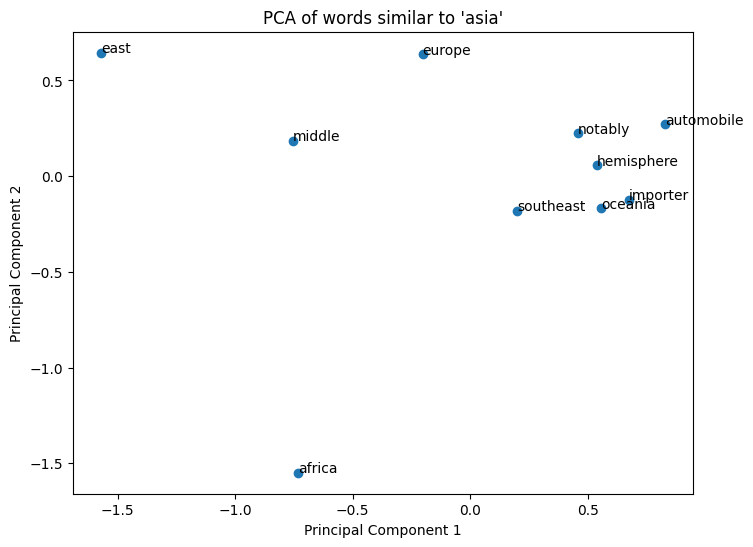

In [10]:
word_vectors = [model_skipgram.wv[word] for word, similarity in word_similar]

pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1])

for i, (word, similarity) in enumerate(word_similar):
    plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]))

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"PCA of words similar to '{check_word}'")
plt.show()


In [14]:
# prompt: implement above check_word similarity using TFIDF

import nltk
import nltk.corpus
from nltk.tokenize import word_tokenize
import gensim
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer

def check_relevant_docs_tfidf(check_word, documents, top_n=10):
    """
    Finds similar words to a given word using TF-IDF.
    """
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([reuters.raw(file) for file in documents])
    feature_names = vectorizer.get_feature_names_out()

    # Find the index of the check_word in the feature names
    try:
        check_word_index = list(feature_names).index(check_word)
    except ValueError:
        print(f"Word '{check_word}' not found in the corpus.")
        return []

    # Get TF-IDF scores for the check word
    check_word_tfidf = tfidf_matrix[:, check_word_index].toarray().flatten()

    # Find documents with high TF-IDF for the check_word
    relevant_docs = sorted(range(len(documents)), key=lambda i: check_word_tfidf[i], reverse=True)
    return relevant_docs[:top_n]


def check_word_similarity_tfidf(check_word, documents, top_n=10):
    """
    Finds similar words to a given word using TF-IDF.
    """
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([reuters.raw(file) for file in documents])
    feature_names = vectorizer.get_feature_names_out()

    # Find the index of the check_word in the feature names
    try:
        check_word_index = list(feature_names).index(check_word)
    except ValueError:
        print(f"Word '{check_word}' not found in the corpus.")
        return []

    # Get TF-IDF scores for the check word
    check_word_tfidf = tfidf_matrix[:, check_word_index].toarray().flatten()

    # Find documents with high TF-IDF for the check_word
    relevant_docs = sorted(range(len(documents)), key=lambda i: check_word_tfidf[i], reverse=True)

    similar_words = []
    for doc_index in relevant_docs[:5]:  # Consider top 5 documents
        doc_text = reuters.raw(documents[doc_index])
        doc_tokens = preprocess(doc_text)

        # Calculate TF-IDF for words in the relevant document
        doc_tfidf_matrix = vectorizer.transform([doc_text])
        doc_feature_indices = doc_tfidf_matrix.nonzero()[1]
        doc_tfidf_scores = doc_tfidf_matrix.data

        for i in range(len(doc_feature_indices)):
            word = feature_names[doc_feature_indices[i]]
            if word != check_word and word not in similar_words:
                similar_words.append(word)
                if len(similar_words) >= top_n:
                    break

        if len(similar_words) >= top_n:
            break

    return similar_words

# Example usage
check_word = 'asia'
similar_words_tfidf = check_word_similarity_tfidf(check_word, documents)
print(f"TF-IDF - Words similar to '{check_word}': {similar_words_tfidf}")


TF-IDF - Words similar to 'asia': ['000', '440', '60', 'and', 'bags', 'below', 'circles', 'circulated', 'clients', 'coffee']


In [18]:
check_word= 'coffee'
similar_words_tfidf = check_word_similarity_tfidf(check_word, documents)
print(f"TF-IDF - Words found in documents related to word '{check_word}': {similar_words_tfidf}")

relevant_docs = check_relevant_docs_tfidf(check_word, documents)
print(f"TF-IDF - Relevant documents retrieved for word '{check_word}': {reuters.raw(documents[relevant_docs[0]])}")

TF-IDF - Words found in documents related to word 'coffee': ['1987', '279', '300', '580', '720', 'after', 'ago', 'agree', 'agreement', 'agreements']
TF-IDF - Relevant documents retrieved for word 'coffee': COFFEE PRICES BAD NEWS FOR LATIN AMERICA -MINISTER
  A senior Nicaraguan official said a
  recent plunge in coffee prices was economically and politically
  disastrous for Latin American coffee-producing countries.
      Nicaraguan Foreign Trade Minister Alejandro Martinez Cuenca
  was in London to brief International Coffee Organisation (ICO)
  executive board producer members after a meeting last weekend
  in Managua attended by eight Latin American coffee producers to
  discuss the fall in coffee prices.
      London coffee prices slid 300 stg per tonne in March, to
  1,279 stg from 1,580 stg at end-February.
      Martinez told reporters the price fall since the ICO failed
  to agree export quotas on March 1 has had disastrous results on
  Latin America, both economically and pol